#**Optimizing Last-Mile Delivery: A Comprehensive Feature Engineering Approach for Delhivery's Data Analysis and Forecasting**

## ***Introduction***

###Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

## **Objective:**
### Enhance Delhivery's Last-Mile Delivery Operations through In-Depth Data Analysis and Feature Engineering to Improve Efficiency, Accuracy, and Predictive Modeling for Future Forecasting.

##**Lets start by importing some necessary libraries & Viewing data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181')

In [ ]:
# Lets have a Look at our Data

df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df[df['trip_uuid'] == 'trip-153741093647649320'][['trip_uuid','source_center','destination_center','actual_time','osrm_time','segment_actual_time','segment_osrm_time']]


,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,11.0,14.0,11.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,20.0,10.0,9.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,28.0,16.0,7.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,40.0,21.0,12.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,44.0,6.0,5.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,11.0,15.0,11.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,17.0,28.0,6.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,29.0,21.0,11.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,39.0,10.0,10.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,45.0,26.0,6.0


### Looking at the above format of data we can conclude that for each trip id we are been giving time at the end of each checkpoint bascically for the delivery to reach from its source to destination it goes through each checkpoint each of its time is mentioned now we need to work on this data by aggregating it.

## **Basic Data cleaning & Data preprocessing.**

In [ ]:
# Removing Null Values

df.isnull().sum(axis = 0 )

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff       

#### Lets convert the fields od_start_time & od_end_time to datetime format

In [ ]:
df['od_start_time'] =  pd.to_datetime(df['od_start_time'])
df['od_end_time']  =  pd.to_datetime(df['od_end_time'])

# Now the dtype has been changed from object to datetime


## **Grouping by sub journey in trip**

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df['segment_actual_time' + '_sum'] = df.groupby('segment_key')['segment_actual_time'].aggregate('cumsum')
df['segment_osrm_distance' + '_sum'] = df.groupby('segment_key')['segment_osrm_distance'].aggregate('cumsum')
df['segment_osrm_time' + '_sum'] = df.groupby('segment_key')['segment_osrm_time'].aggregate('cumsum')

In [ ]:
df[df['trip_uuid']=='trip-153741093647649320'][['trip_uuid', 'source_center',
       'destination_center', 'actual_time',
       'osrm_time', 'segment_actual_time',
       'segment_osrm_time', 'segment_actual_time_sum'	,'segment_osrm_distance_sum',	'segment_osrm_time_sum']]

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time,segment_osrm_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153741093647649320,IND388121AAA,IND388620AAB,14.0,11.0,14.0,11.0,14.0,11.9653,11.0
1,trip-153741093647649320,IND388121AAA,IND388620AAB,24.0,20.0,10.0,9.0,24.0,21.7243,20.0
2,trip-153741093647649320,IND388121AAA,IND388620AAB,40.0,28.0,16.0,7.0,40.0,32.5395,27.0
3,trip-153741093647649320,IND388121AAA,IND388620AAB,62.0,40.0,21.0,12.0,61.0,45.5619,39.0
4,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,44.0,6.0,5.0,67.0,49.4772,44.0
5,trip-153741093647649320,IND388620AAB,IND388320AAA,15.0,11.0,15.0,11.0,15.0,12.1171,11.0
6,trip-153741093647649320,IND388620AAB,IND388320AAA,44.0,17.0,28.0,6.0,43.0,21.2890,17.0
7,trip-153741093647649320,IND388620AAB,IND388320AAA,65.0,29.0,21.0,11.0,64.0,35.8252,28.0
8,trip-153741093647649320,IND388620AAB,IND388320AAA,76.0,39.0,10.0,10.0,74.0,47.1900,38.0
9,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,45.0,26.0,6.0,100.0,53.2334,44.0


## **aggregating at sub-journey level**

In [ ]:
create_segment_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',


    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',

    }

In [ ]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [ ]:
segment[segment['trip_uuid']=='trip-153741093647649320'][['trip_uuid', 'source_center',
       'destination_center', 'actual_time',
       'osrm_time', 'segment_actual_time_sum'	,	'segment_osrm_time_sum']]

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time_sum,segment_osrm_time_sum
10370,trip-153741093647649320,IND388121AAA,IND388620AAB,68.0,44.0,67.0,44.0
10371,trip-153741093647649320,IND388620AAB,IND388320AAA,102.0,45.0,100.0,44.0


In [ ]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  object        
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [ ]:
segment.describe()

,index,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000
mean,13110.500000,298.553390,92.533054,200.926588,90.785333,114.975332,199.095645,125.587130,101.793341
std,7569.783716,441.116816,209.952355,385.730908,185.554359,254.426468,382.150687,286.670106,216.202739
min,0.000000,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,6555.250000,90.000000,21.654149,51.000000,25.000000,27.719150,50.000000,28.429100,25.000000
50%,13110.500000,152.000000,35.044329,84.000000,39.000000,43.543550,83.000000,45.797650,42.000000
75%,19665.750000,307.000000,65.557393,167.000000,72.000000,85.443950,166.000000,91.023575,79.000000
max,26221.000000,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,2640.924700,1938.000000


## **Feature Engineering : to Calculate time taken between od_start_time and od_end_time**

In [ ]:
segment['od_time_diff_hour'] = ((segment['od_end_time'] - segment['od_start_time']).dt.total_seconds())/60
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

## **aggregating at whole journey level**

In [ ]:
create_trip_dict = {

    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',

    'source_center' : 'first',
    'source_name' : 'first',

    'destination_center' : 'last',
    'destination_name' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',

    }

In [ ]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop= True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [ ]:
trip[trip['trip_uuid']=='trip-153741093647649320'][['trip_uuid', 'source_center',
       'destination_center', 'actual_time',
       'osrm_time', 'segment_actual_time_sum'	,	'segment_osrm_time_sum']]

,trip_uuid,source_center,destination_center,actual_time,osrm_time,segment_actual_time_sum,segment_osrm_time_sum
5917,trip-153741093647649320,IND388121AAA,IND388320AAA,170.0,89.0,167.0,88.0


## **In depth Analysis of feature engineered columns and derive conclusions using Hypothesis testing**

#### Now using the aggregating values per trip from source to destination centre and aggregrating values from source to hub to destination we observe that there is some time and distance difference between the actual & osrm time and the segment actual and osrm time so lets see if this difference is significant or not.

###Hypothesis test of actual_time v/s segment_actual_time_sum

In [ ]:
trip[['actual_time', 'segment_actual_time_sum']].head()

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0


In [ ]:
# importing the library & checking the mean for the each time
from scipy.stats import ttest_ind

trip['actual_time'].mean(), trip['segment_actual_time_sum'].mean()

# As we can see below there is small difference in the mean lets run an Hypothesis test to check if the difference is significant or not.

(356.30601203760057, 353.0591735984311)

- **Null Hypothesis (H0):**
  The means of both times are the same; the difference is not significant.
  \( \mu_1 = \mu_2 \)

- **Alternative Hypothesis (Ha):**
  The difference is significant; the means of both times are not equal.
  \( \mu_1 \neq \mu_2 \)

In [ ]:
t_stat, p_value = ttest_ind(trip['actual_time'], trip['segment_actual_time_sum'])
print(p_value)
if p_value < 0.05:
    print("Reject H0 : The difference is significant; the means of both times are not equal")
else:
    print("Fail to reject H0 : This means of both times are the same; the difference is not significant")

0.6174479719707524
Fail to reject H0 : This means of both times are the same; the difference is not significant


### Now lets carry out this test for the remaining aggregated values.

###Hypothesis test of osrm_time v/s segment_osrm_time_sum

In [ ]:
trip[['osrm_time', 'segment_osrm_time_sum']].head()

,osrm_time,segment_osrm_time_sum
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0


In [ ]:
trip['osrm_time'].mean(), trip['segment_osrm_time_sum'].mean()

# As we can see below there is quite bit difference in the mean lets run an Hypothesis test to check if the difference is significant or not.

(160.99093798606884, 180.5115980252925)

In [ ]:
t_stat, p_value = ttest_ind(trip['osrm_time'], trip['segment_osrm_time_sum'])
print(p_value)
if p_value < 0.05:
    print("Reject H0 : The difference is significant; the means of both times are not equal")
else:
    print("Fail to reject H0 : This means of both times are the same; the difference is not significant")

1.128703468644937e-08
Reject H0 : The difference is significant; the means of both times are not equal


###Hypothesis test of osrm_distance v/s segment_osrm_distance_sum

In [ ]:
trip[['osrm_distance', 'segment_osrm_distance_sum']].head()

,osrm_distance,segment_osrm_distance_sum
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919


In [ ]:
trip['osrm_distance'].mean(), trip['segment_osrm_distance_sum'].mean()

# As we can see below there is quite bit difference in the mean lets run an Hypothesis test to check if the difference is significant or not.

(203.88741124636508, 222.7054664434977)

In [ ]:
t_stat, p_value = ttest_ind(trip['osrm_distance'], trip['segment_osrm_distance_sum'])
print(p_value)
if p_value < 0.05:
    print("Reject H0 : The difference is significant; the means of both times are not equal")
else:
    print("Fail to reject H0 : This means of both times are the same; the difference is not significant")

4.0929578191203324e-05
Reject H0 : The difference is significant; the means of both times are not equal


###Hypothesis test of actual_distance_to_destination v/s osrm_distance

In [ ]:
trip[['actual_distance_to_destination','osrm_distance']].head()

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918


In [ ]:
trip['actual_distance_to_destination'].mean(), trip['osrm_distance'].mean()

# As we can see below there is quite bit difference in the mean lets run an Hypothesis test to check if the difference is significant or not.

(164.0901961720598, 203.88741124636508)

In [ ]:
t_stat, p_value = ttest_ind(trip['actual_distance_to_destination'], trip['osrm_distance'])
print(p_value)
if p_value < 0.05:
    print("Reject H0 : The difference is significant; the means of both times are not equal")
else:
    print("Fail to reject H0 : This means of both times are the same; the difference is not significant")

7.65905658899532e-24
Reject H0 : The difference is significant; the means of both times are not equal


## **Feature Engineering for destination name, source name and trip creation time**

In [ ]:
#lowering all columns
trip['destination_name'] = trip['destination_name'].str.lower()
trip['source_name'] = trip['source_name'].str.lower()

In [ ]:
trip[['destination_name', 'source_name']].head(3)

,destination_name,source_name
0,kanpur_central_h_6 (uttar pradesh),kanpur_central_h_6 (uttar pradesh)
1,doddablpur_chikadpp_d (karnataka),doddablpur_chikadpp_d (karnataka)
2,gurgaon_bilaspur_hb (haryana),gurgaon_bilaspur_hb (haryana)


In [ ]:
def place2state(x):
    # transform  "gurgaon_bilaspur_hb (haryana)" into "haryana)""
    state = x.split('(')[1]

    return state[:-1] #removing ')' from ending

def place2city(x):
    # We will remove state
    city = x.split(' (')[0]

    city = city.split('_')[0]

    #Now dealing with edge cases

    if city == 'pnq vadgaon sheri dpc':
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'


    return city

def place2city_place(x):

    # We will remove state
    x = x.split(' (')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # Small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]


    # Now we need to deal with edge cases or imporper name convention

    #if len(x.split(' ')) == 2:
    #

    return x.split(' ')[0]


def place2code(x):
    # We will remove state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'


In [ ]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']].head()

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d


In [ ]:
trip['source_state'] = trip['source_name'].apply(lambda x: place2state(x))
trip['source_city']  = trip['source_name'].apply(lambda x: place2city(x))
trip['source_place'] = trip['source_name'].apply(lambda x: place2city_place(x))
trip['source_code']  = trip['source_name'].apply(lambda x: place2code(x))

In [ ]:
trip[['source_state', 'source_city', 'source_place', 'source_code']].head()

,source_state,source_city,source_place,source_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai hub,mumbai,none
4,karnataka,bellary,bellary,none


In [ ]:
trip['trip_creation_time'] =  pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek
trip['time_category'] = pd.cut(trip['trip_hour'],
                               bins=[-1, 4, 12, 16, 24],
                               labels=['Night', 'Morning', 'Noon', 'Evening'],
                               include_lowest=True)

In [ ]:
trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']].head()

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2


### Now that based on previous data we are done with the feature engineering now this final data can be used for analysis if required, below is the final trip data frame

In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,time_category
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,uttar pradesh,kanpur,central,6,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2,Night
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2,Night
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,haryana,gurgaon,bilaspur,hb,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2,Night
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2,Night
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2,Night


## **Find outliers in numerical variable and Handling Outliers as per buisness requirements**

In [ ]:
num_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

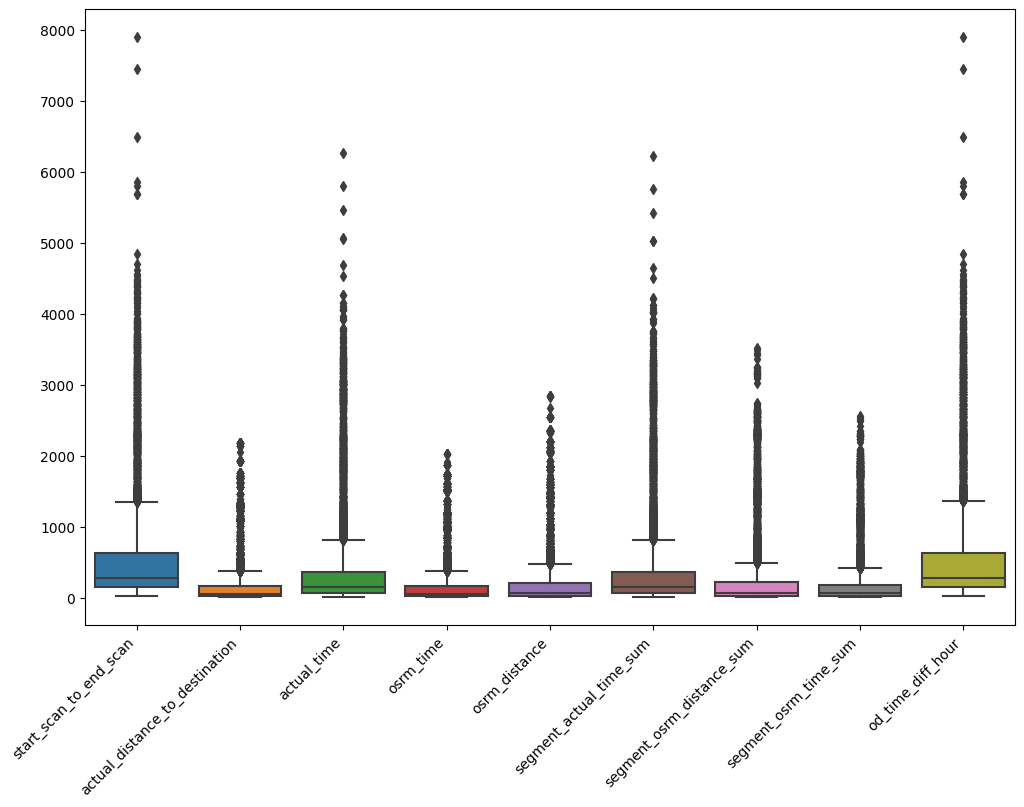

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=trip[num_cols])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # You can adjust the rotation angle as needed

plt.show()


#### As we can see from the above box plot there are outliers present for almost all the numeric data we have passed

In [ ]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1


IQR

start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time_sum           298.000000
segment_osrm_distance_sum         183.981750
segment_osrm_time_sum             154.000000
od_time_diff_hour                 483.839201
dtype: float64

In [ ]:
print(trip.shape , "trip data frame before outliers present")
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(trip.shape, " trip data frame after outlier removal")

trip = trip.reset_index(drop=True)

# So we have removed the outliers based on IQR range

(14787, 33) trip data frame before outliers present
(12723, 33)  trip data frame after outlier removal


<Axes: >

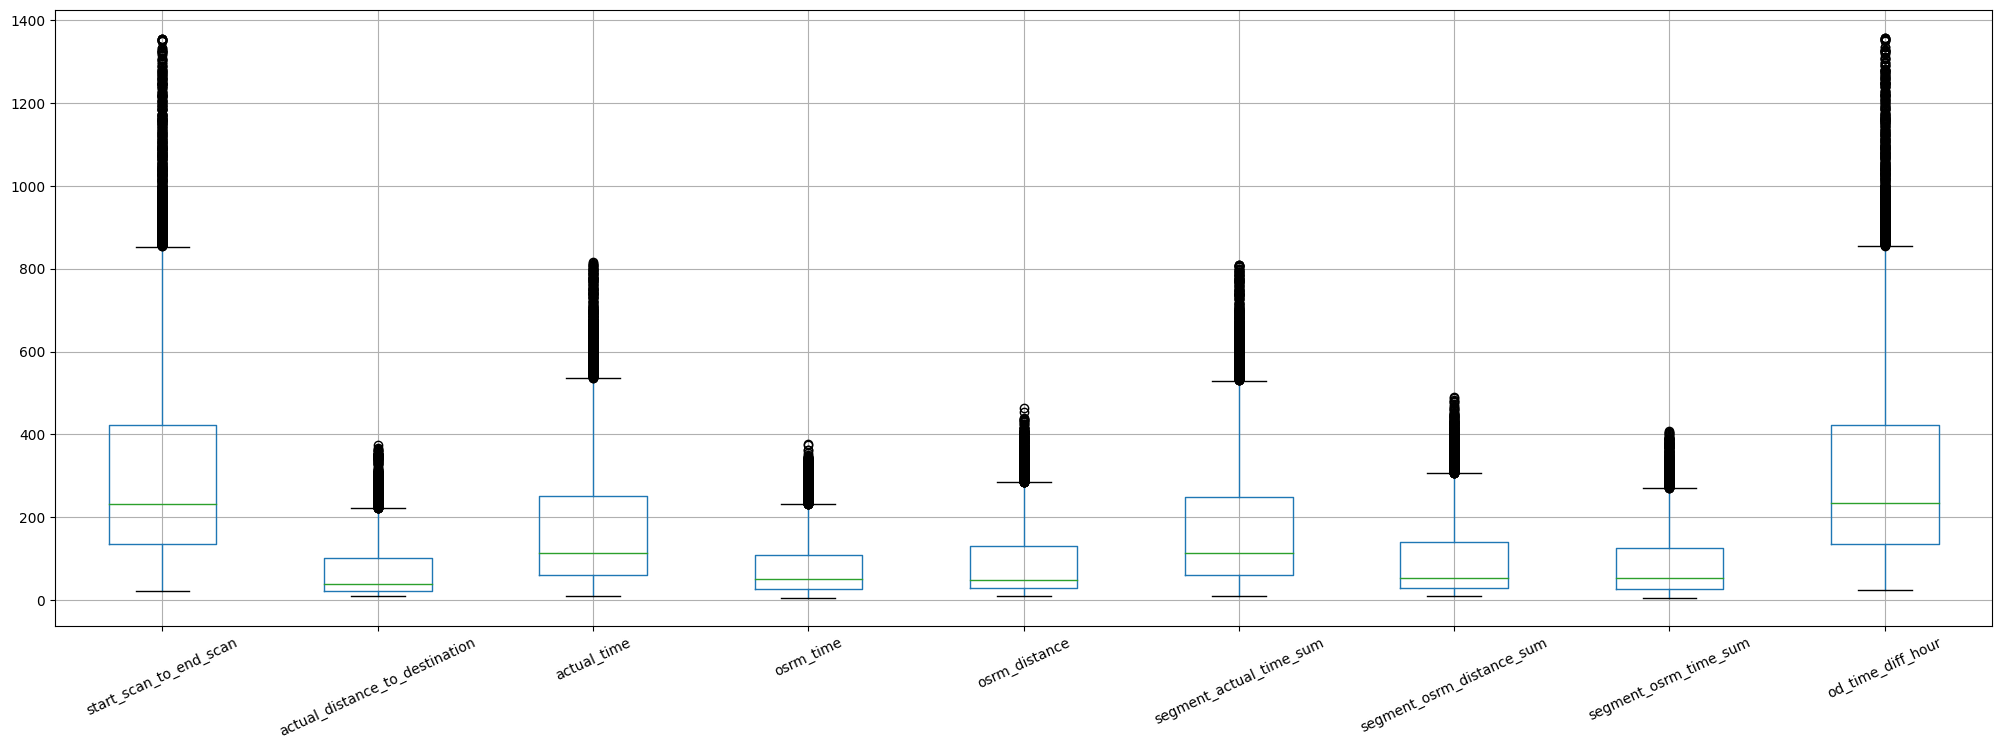

In [ ]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [ ]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [ ]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


## Visual Analysis

In [ ]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek,time_category
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),-0.548546,-0.544839,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,karnataka,doddablpur,chikadpp,d,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2,Night
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),-0.861602,-0.861856,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,maharashtra,mumbai,mirard,ip,maharashtra,mumbai hub,mumbai,none,2018,9,0,12,37,2,Night
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),1.552838,1.552812,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,karnataka,sandur,wrdn1dpp,d,karnataka,bellary,bellary,none,2018,9,0,12,37,2,Night
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),-0.513328,-0.510150,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,tamil nadu,chennai,chennai,none,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2,Night
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),-0.869428,-0.871585,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,tamil nadu,chennai,vandalur,dc,tamil nadu,chennai,chrompet,dpc,2018,9,0,12,37,2,Night


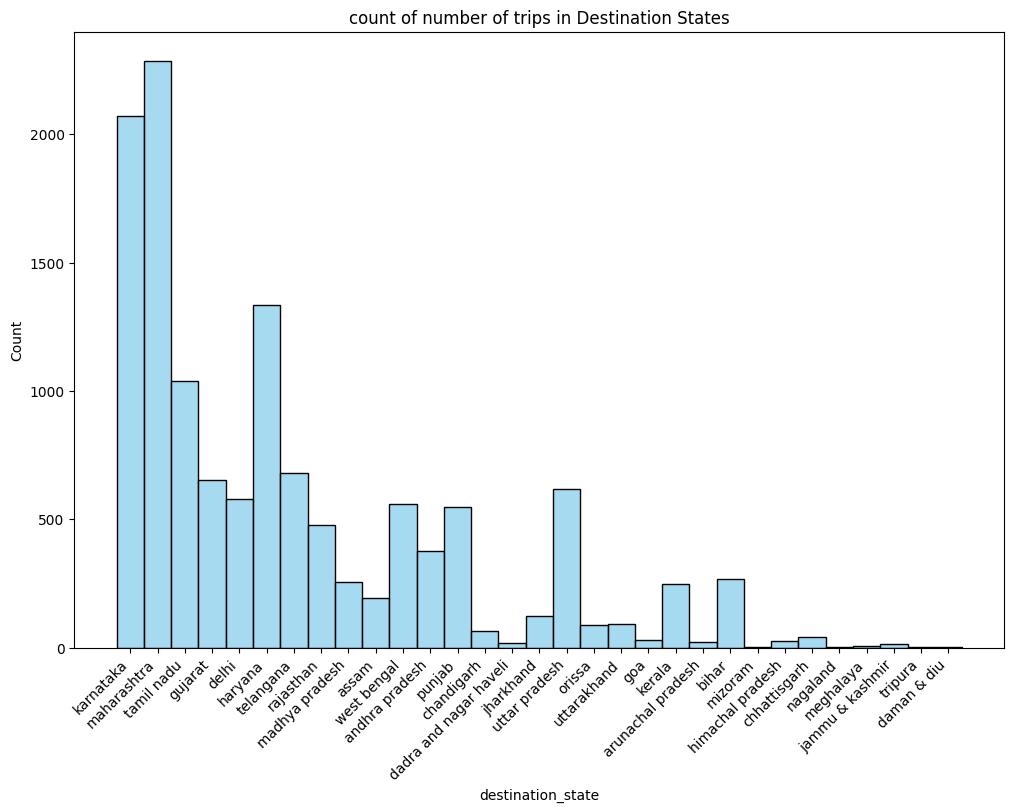

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=trip, x='destination_state', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('count of number of trips in Destination States')
plt.show()


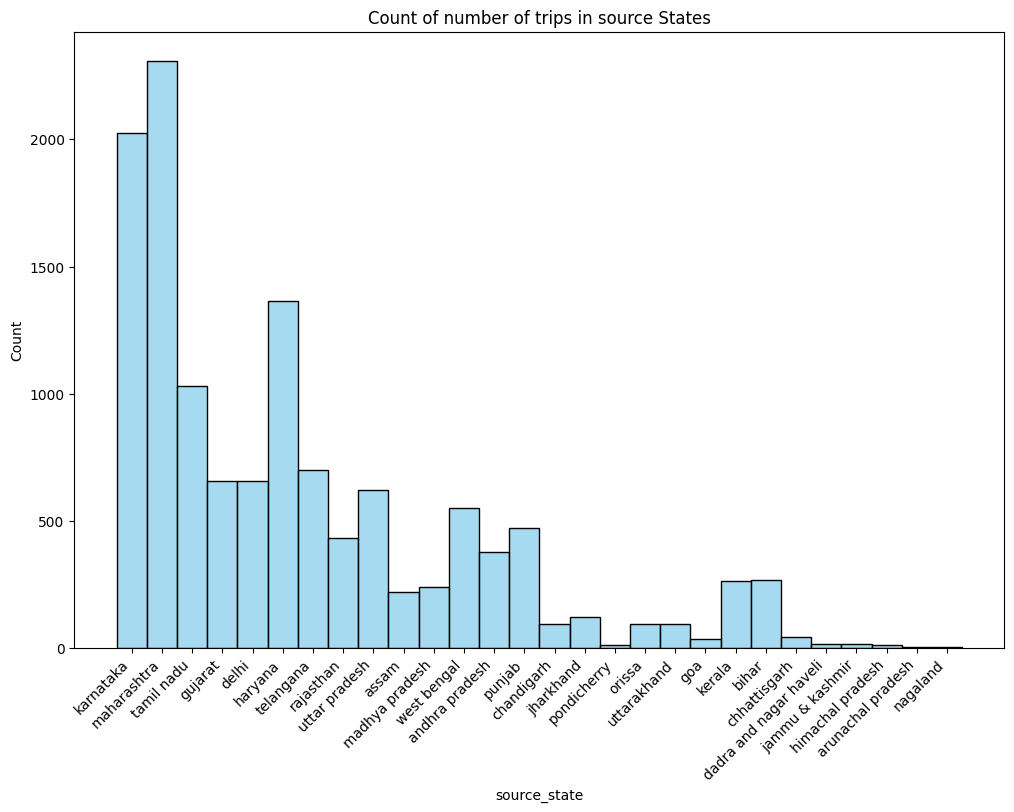

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=trip, x='source_state', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Count of number of trips in source States')
plt.show()

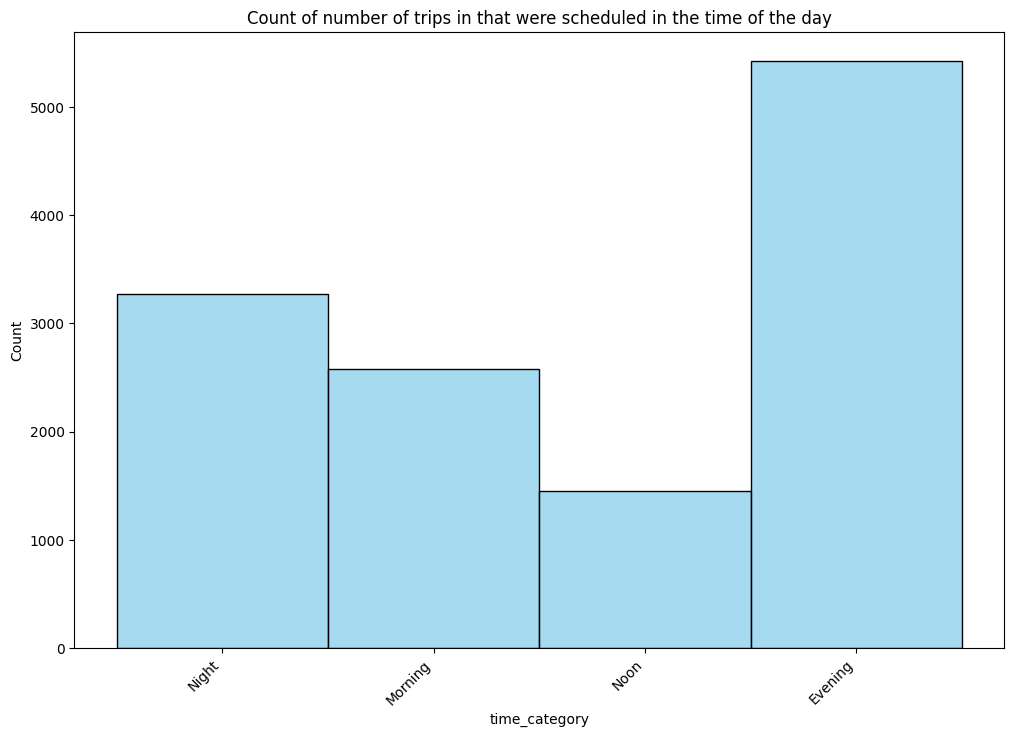

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data=trip, x='time_category', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Count of number of trips in that were scheduled in the time of the day')
plt.show()

## Recomendation examples:

There is a significant difference between OSRM and actual parameters and also there is a significant difference for OSRM actual and segmented values but not significant difference in case of actual & segmented time.

### There is a need to:


Revisit information fed to routing engine for trip planning.
Check for discrepancies with transporters, if the routing engine is configured for optimum results.


North, South and West Zones corridors have significant traffic of orders. But, we have a smaller presence in Central, Eastern and North-Eastern zone. However it would be difficult to conclude this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.


From state point of view, we have heavy traffic in Mahrashtra followed by Karnataka. This is a good indicator that we need to plan for resources on ground in these 2 states on priority. Especially, during festive seasons.

Also we see in the evening time the number of traffic or rides increases